INFO: Run with conda environment sc-mar2021

# 0. Load packages

<a id='load_packages'></a>

In [1]:
import os
import sys
import glob
import re

import anndata
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb

In [2]:
plt.rcParams['figure.figsize']=(20,12) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.19.1
certifi             2021.05.30
cffi                1.14.5
chardet             4.0.0
constants           NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                2.10.0
highs_wrapper       NA
idna                2.10
igraph              0.9.1
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1
legacy_api_wrap     1.2
leidenalg           0.8.4
llvmlite            0.35.0
louvain             0.7.0
markupsa

In [3]:
sys.path.insert(0,'..')
import paths_downsampling as paths
p = paths.get_paths()
print(p)

{'basedir': '/psycl/g/mpsagbinder/mgp/workspace/SingleNuc_PostmortemBrain/', 'rawdir_RNA': '/psycl/g/mpsngs/HiSeq_Helmholtz/20210324_Anna_Froehlich_10X_RNAseq/03_downsampled/', 'figdir': '/psycl/g/mpsagbinder/mgp/workspace/SingleNuc_PostmortemBrain/figures/', 'writedir': '/psycl/g/mpsagbinder/mgp/workspace/SingleNuc_PostmortemBrain/scanpy_adata/', 'allendir': '/psycl/g/mpsagbinder/mgp/workspace/SingleNuc_PostmortemBrain/reference_data/allen_human/'}


# 1. Load data

<a id='load_data'></a>

In [5]:
adata = sc.read(p['allendir']+'adata_sct_allenBrain.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 49417 × 47952
    obs: 'exp_component_name', 'specimen_type', 'cluster_color', 'cluster_order', 'cluster_label', 'class_color', 'class_order', 'class_label', 'subclass_color', 'subclass_order', 'subclass_label', 'full_genotype_color', 'full_genotype_order', 'full_genotype_label', 'donor_sex_color', 'donor_sex_order', 'donor_sex_label', 'region_color', 'region_order', 'region_label', 'cortical_layer_color', 'cortical_layer_order', 'cortical_layer_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_order', 'cell_type_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_alt_alias_label', 'cell_type_designation_color', 'cell_type_designation_order', 'cell_type_designation_label', 'external_donor_name_color', 'external_donor_name_order', 'external_donor_name_label', 'outlier_call', 'outlier_type'
    var: 'n_cells', 'highly_variable_sct_residual_v

In [8]:
# Store raw count in another layer and corrected counts in main layer adata.X
adata.layers['counts'] = adata.X
adata.X = adata.layers['sct_corrected']

In [12]:
# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [9]:
# Calculate the visualizations
sc.pp.pca(adata, n_comps=50)     # uses by default highly variable genes if they were determined before, maybe change this as HVGs can be wrong before batch correction
sc.pp.neighbors(adata)

sc.tl.umap(adata)

computing PCA
    on highly variable genes
/u/ngerst/anaconda3/envs/sc-mar2021/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    with n_comps=50
    finished (0:00:13)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:09)


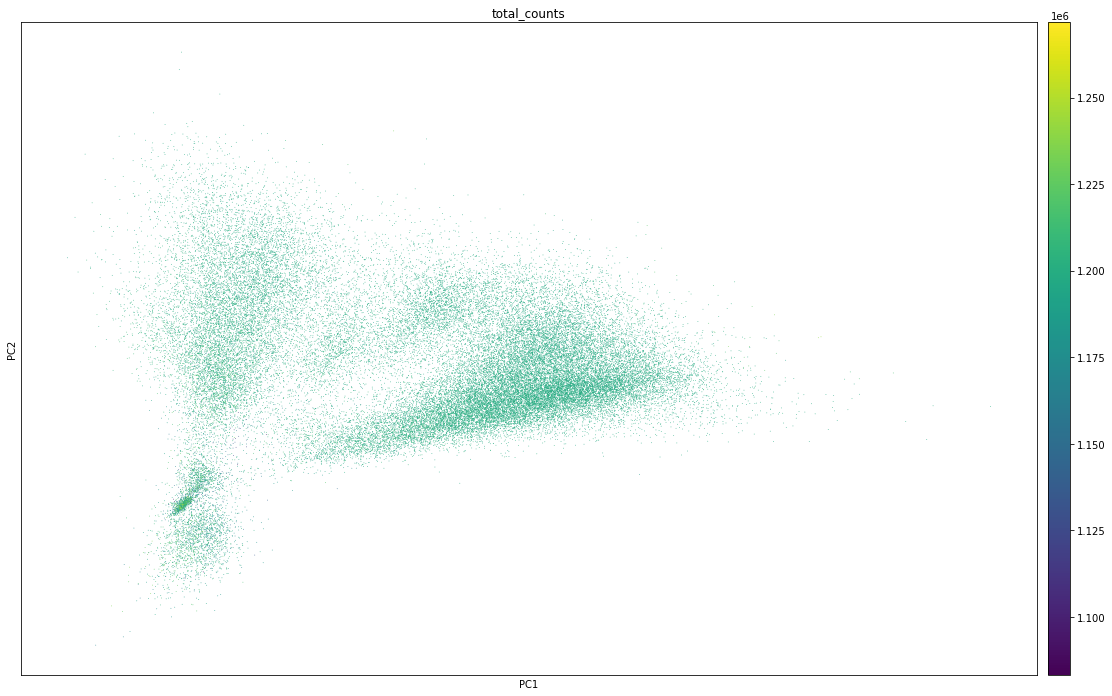

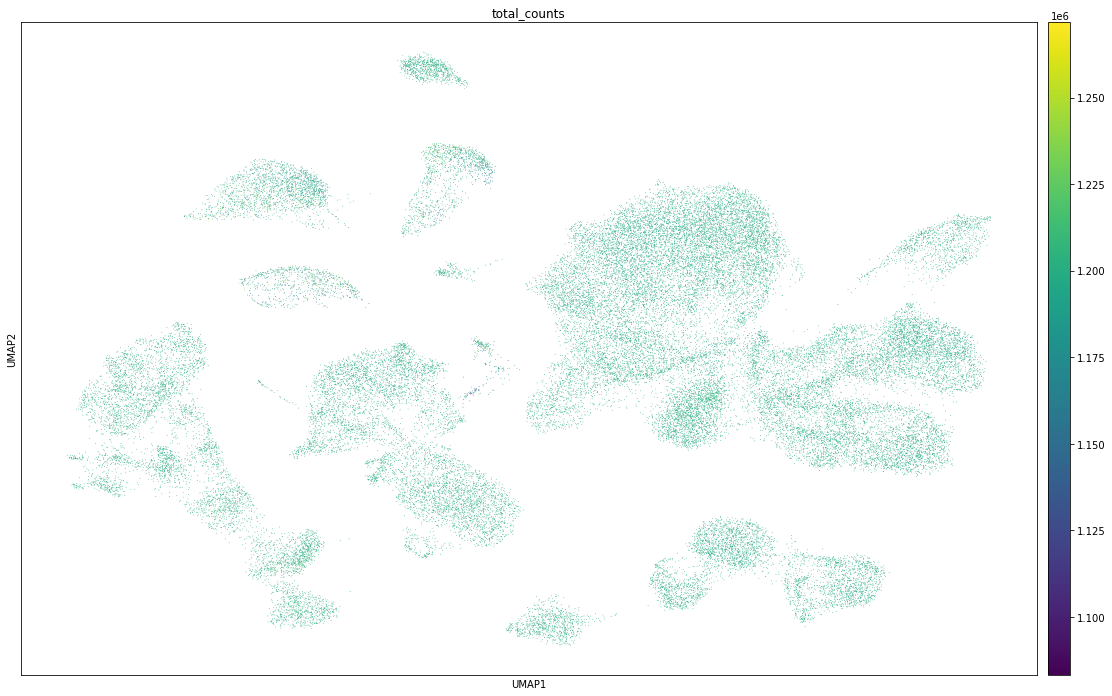

In [13]:
sc.pl.pca_scatter(adata, color='total_counts')
sc.pl.umap(adata, color='total_counts')

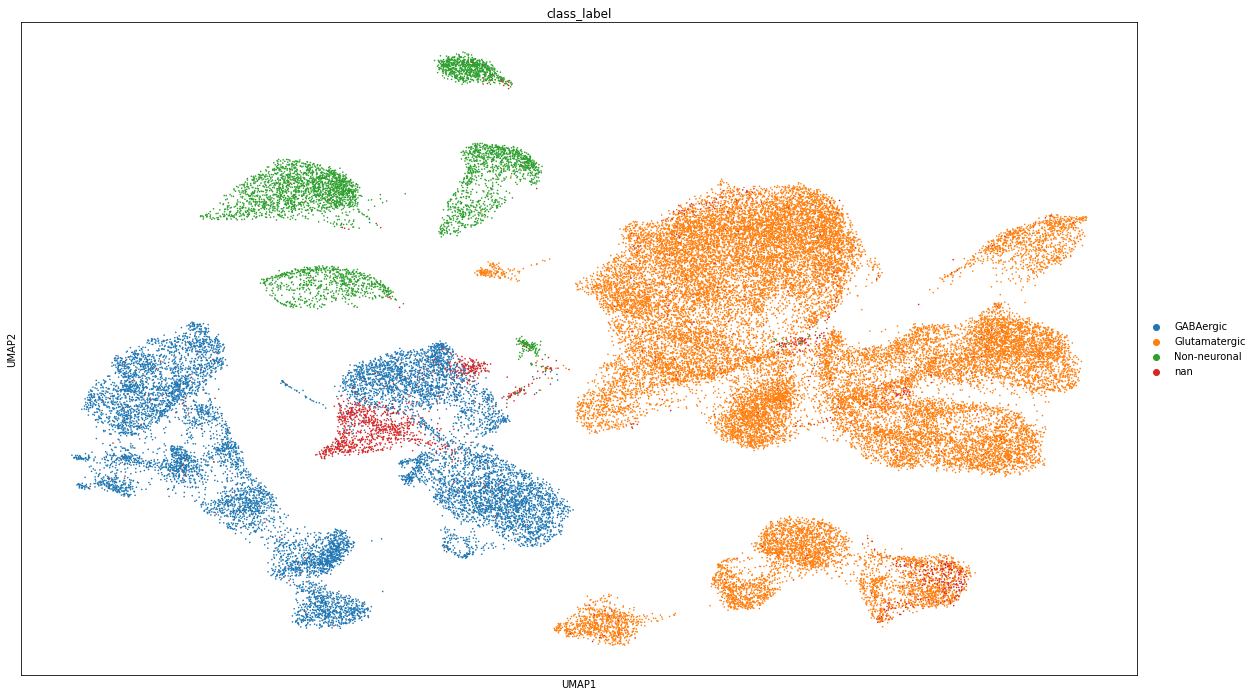

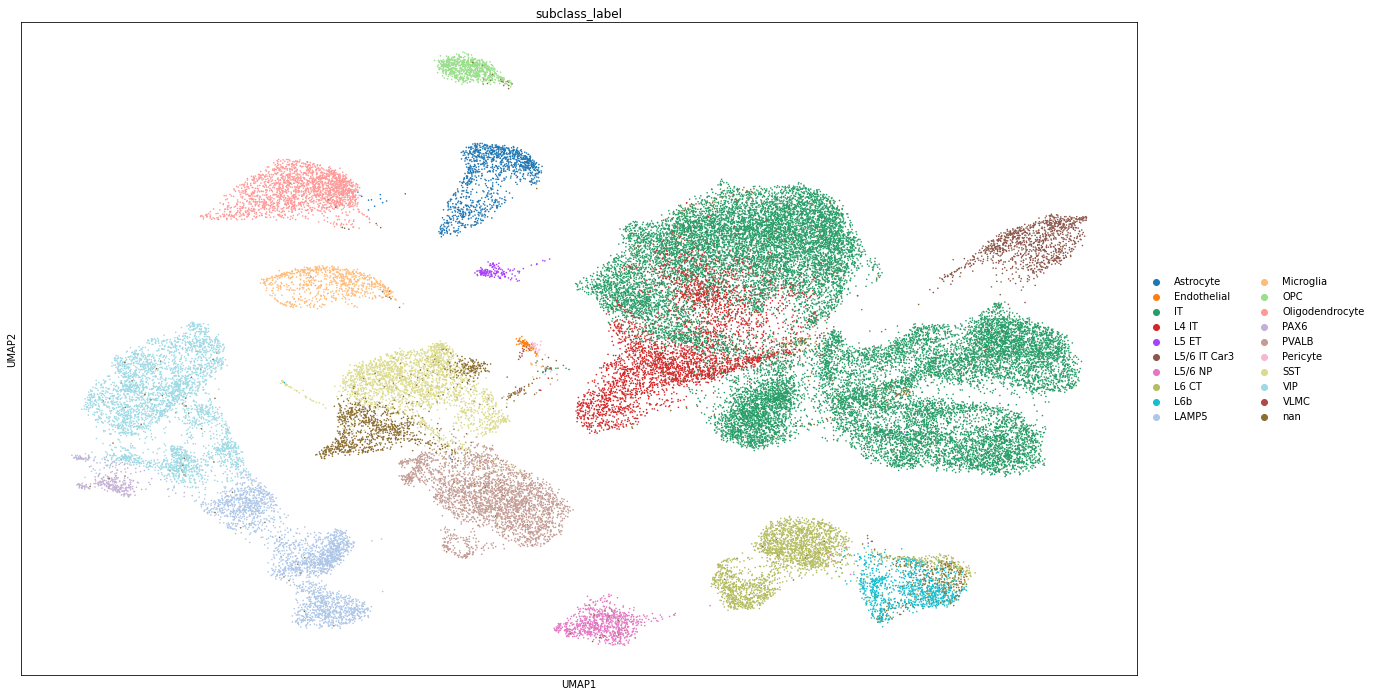

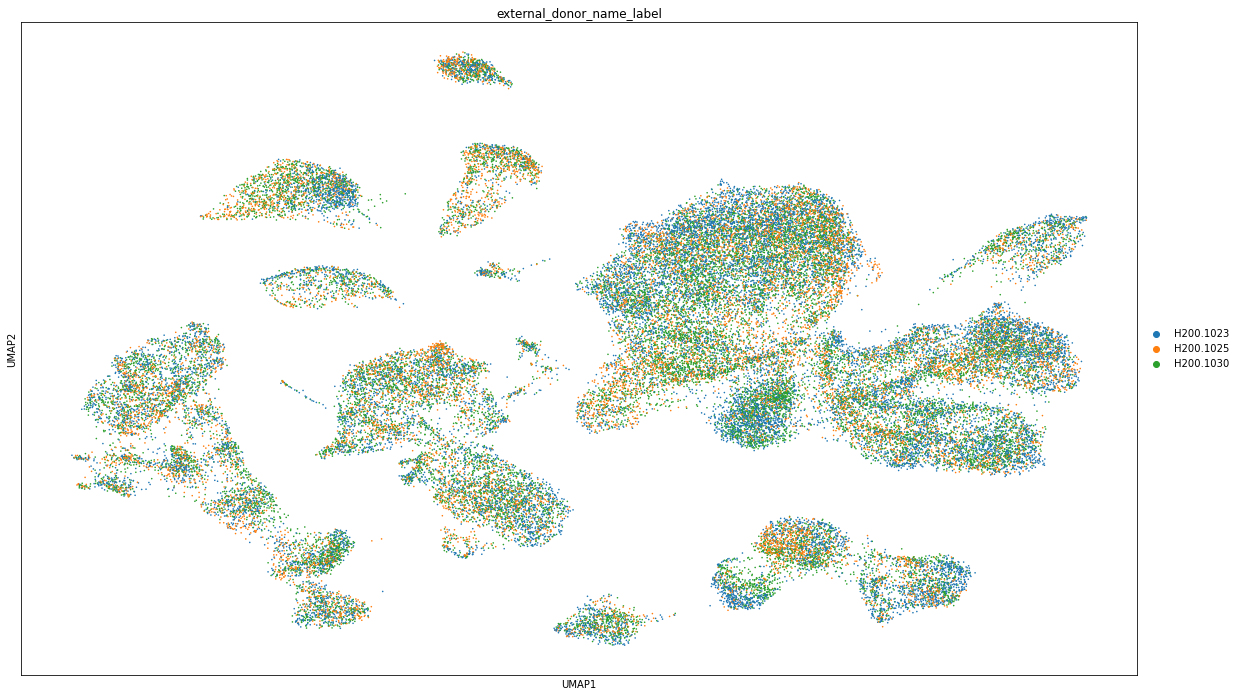

In [14]:
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['class_label'], size=500000 /adata.n_obs)#, palette=sc.pl.palettes.default_64)
sc.pl.umap(adata, color=['subclass_label'], size=500000 /adata.n_obs)#, palette=sc.pl.palettes.default_64)
sc.pl.umap(adata, color=['external_donor_name_label'], size=500000 /adata.n_obs)

In [15]:
# Save adata object
adata.write(p['allendir']+'adata_sct_umap_allenBrain.h5ad')

In [16]:
adata.var

,n_cells,highly_variable_sct_residual_var,highly_variable,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
3.8-1.2,23,3.449097,False,23,0.011292,0.011228,99.953457,558.0,6.326149
3.8-1.3,48,9.918430,True,48,0.063440,0.061509,99.902867,3135.0,8.050703
3.8-1.4,27,3.995223,False,27,0.013619,0.013527,99.945363,673.0,6.513230
3.8-1.5,28,2.112301,False,28,0.004938,0.004925,99.943339,244.0,5.501258
5-HT3C2,1093,2.837045,False,1092,0.220693,0.199419,97.790234,10906.0,9.297160
...,...,...,...,...,...,...,...,...,...
ZYX,24628,0.222937,False,24640,28.716494,3.391702,50.138616,1419083.0,14.165522
ZZEF1,37165,0.504272,False,37000,57.763523,4.073521,25.126981,2854500.0,14.864408
ZZZ3,40929,0.760264,False,40809,143.103810,4.970534,17.419107,7071761.0,15.771620
bA255A11.4,85,1.447194,False,85,0.016937,0.016796,99.827994,837.0,6.731018


In [4]:
adata = sc.read(p['allendir']+'adata_sct_umap_allenBrain.h5ad')
adata

AnnData object with n_obs × n_vars = 49417 × 47952
    obs: 'exp_component_name', 'specimen_type', 'cluster_color', 'cluster_order', 'cluster_label', 'class_color', 'class_order', 'class_label', 'subclass_color', 'subclass_order', 'subclass_label', 'full_genotype_color', 'full_genotype_order', 'full_genotype_label', 'donor_sex_color', 'donor_sex_order', 'donor_sex_label', 'region_color', 'region_order', 'region_label', 'cortical_layer_color', 'cortical_layer_order', 'cortical_layer_label', 'cell_type_accession_color', 'cell_type_accession_order', 'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_order', 'cell_type_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_order', 'cell_type_alt_alias_label', 'cell_type_designation_color', 'cell_type_designation_order', 'cell_type_designation_label', 'external_donor_name_color', 'external_donor_name_order', 'external_donor_name_label', 'outlier_call', 'outlier_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 't

In [5]:
adata.var

,n_cells,highly_variable_sct_residual_var,highly_variable,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
3.8-1.2,23,3.449097,False,23,0.011292,0.011228,99.953457,558.0,6.326149
3.8-1.3,48,9.918430,True,48,0.063440,0.061509,99.902867,3135.0,8.050703
3.8-1.4,27,3.995223,False,27,0.013619,0.013527,99.945363,673.0,6.513230
3.8-1.5,28,2.112301,False,28,0.004938,0.004925,99.943339,244.0,5.501258
5-HT3C2,1093,2.837045,False,1092,0.220693,0.199419,97.790234,10906.0,9.297160
...,...,...,...,...,...,...,...,...,...
ZYX,24628,0.222937,False,24640,28.716494,3.391702,50.138616,1419083.0,14.165522
ZZEF1,37165,0.504272,False,37000,57.763523,4.073521,25.126981,2854500.0,14.864408
ZZZ3,40929,0.760264,False,40809,143.103810,4.970534,17.419107,7071761.0,15.771620
bA255A11.4,85,1.447194,False,85,0.016937,0.016796,99.827994,837.0,6.731018
